In [31]:
# 0. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import pickle, os


In [36]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True, errors='ignore')

# Encode target
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Create bins and log transform
df['tenure_bin'] = pd.cut(df['YearsAtCompany'], bins=[-1, 1, 3, 6, 10, 40],
                          labels=['<1yr', '1-3yrs', '4-6yrs', '7-10yrs', '10+yrs'])
df['age_bin'] = pd.cut(df['Age'], bins=[17, 25, 30, 35, 40, 45, 50, 60], 
                       labels=['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-60'])
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])

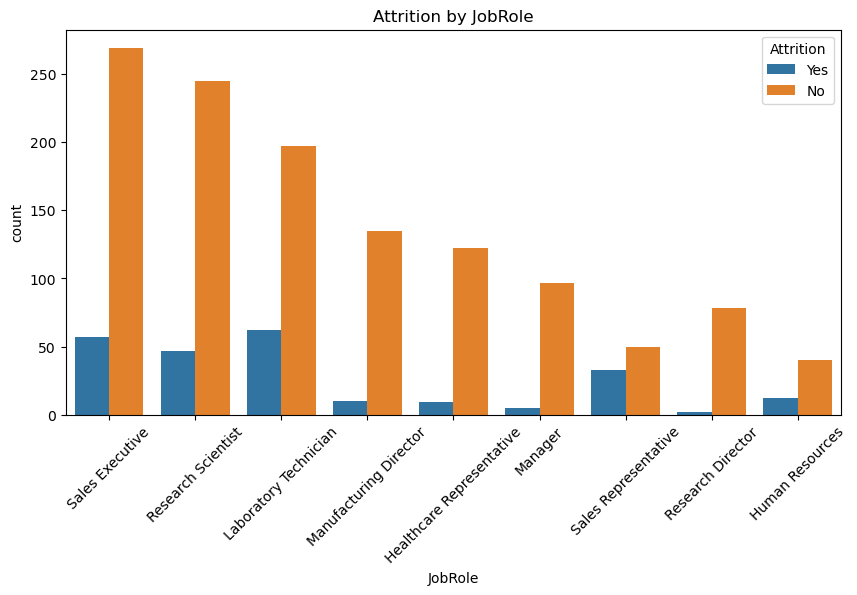

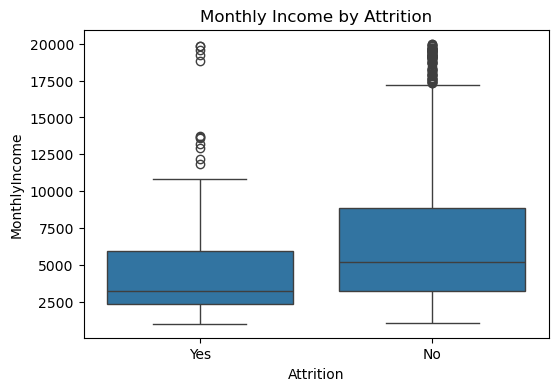

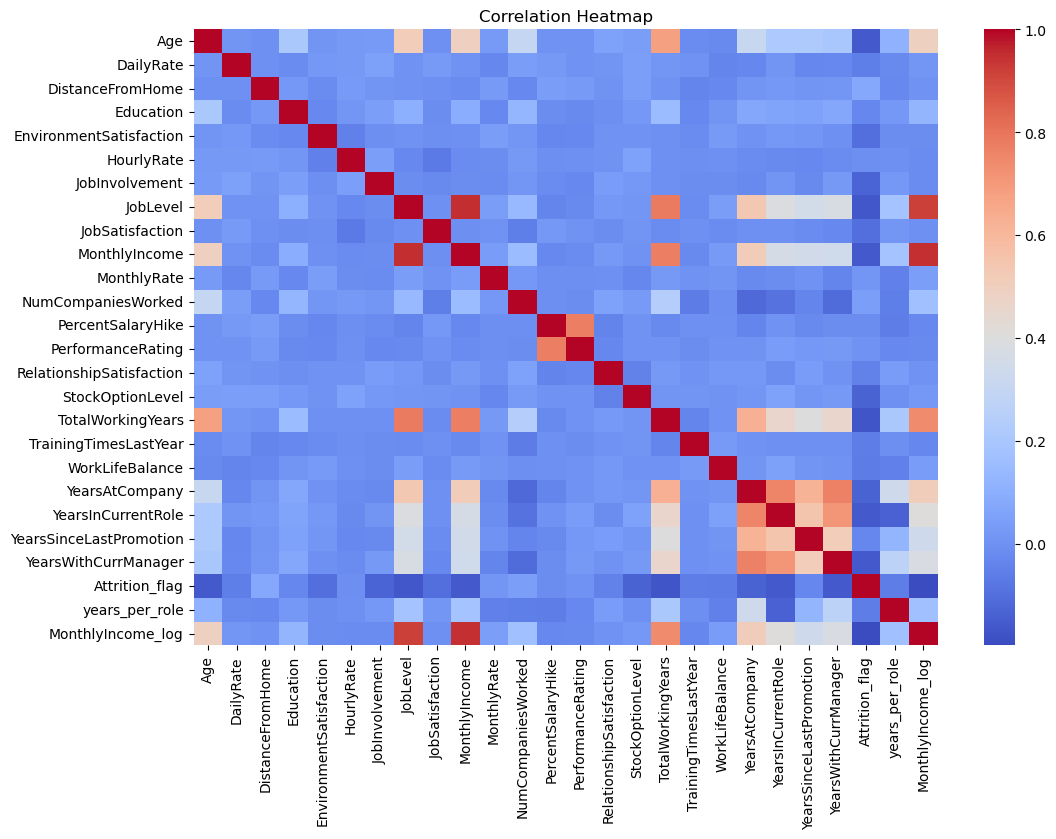

In [37]:
# Attrition by JobRole
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition by JobRole')
plt.show()

# Salary distribution
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# 4. DEFINE FEATURES & PREPROCESSOR
# ----------------------------------
X = df.drop(columns=['Attrition', 'Attrition_flag'])
y = df['Attrition_flag']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

Categorical: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education_label']
Numerical: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'tenure_bin', 'age_bin', 'years_per_role', 'MonthlyIncome_log']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y, 
    random_state=42
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (1029, 35), Test size: (441, 35)


In [41]:
print("All columns in X:", X.columns.tolist())

All columns in X: ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Education_label', 'tenure_bin', 'age_bin', 'years_per_role', 'MonthlyIncome_log']


In [42]:
# Redefine AFTER all new bins/features created
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()
print("CATEGORICAL:", cat_cols)
print("NUMERICAL:", num_cols)


CATEGORICAL: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education_label', 'tenure_bin', 'age_bin']
NUMERICAL: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'years_per_role', 'MonthlyIncome_log']


In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [44]:
# Re-define X and y
X = df.drop(columns=['Attrition', 'Attrition_flag'])
y = df['Attrition_flag']

# Make sure all object or labeled columns are in cat_cols
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("Final CATEGORICAL:", cat_cols)
print("Final NUMERICAL:", num_cols)

# Pipeline as before:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Logistic Regression
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42))
])
log_reg_pipeline.fit(X_train, y_train)  # <-- should now work!
y_pred_lr = log_reg_pipeline.predict(X_test)
y_pred_lr_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300, class_weight='balanced', random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_rf_prob = rf_pipeline.predict_proba(X_test)[:, 1]


Final CATEGORICAL: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education_label', 'tenure_bin', 'age_bin']
Final NUMERICAL: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'years_per_role', 'MonthlyIncome_log']


In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve,
    ConfusionMatrixDisplay  # <--- Add this line!
)
import pickle, os

Model: Logistic Regression
Accuracy: 0.7710
ROC AUC: 0.8107
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85       370
           1       0.38      0.68      0.49        71

    accuracy                           0.77       441
   macro avg       0.65      0.73      0.67       441
weighted avg       0.84      0.77      0.79       441



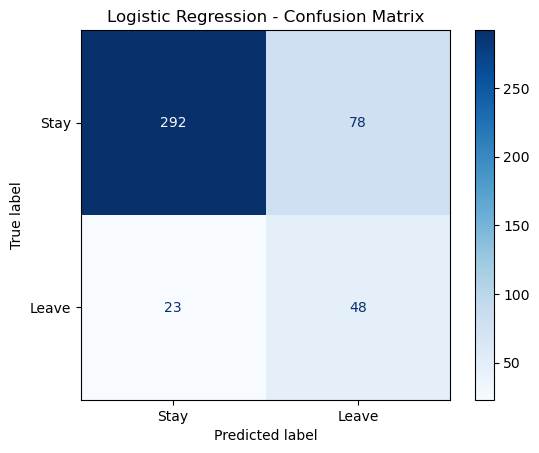

Model: Random Forest
Accuracy: 0.8367
ROC AUC: 0.7546
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.47      0.10      0.16        71

    accuracy                           0.84       441
   macro avg       0.66      0.54      0.54       441
weighted avg       0.79      0.84      0.79       441



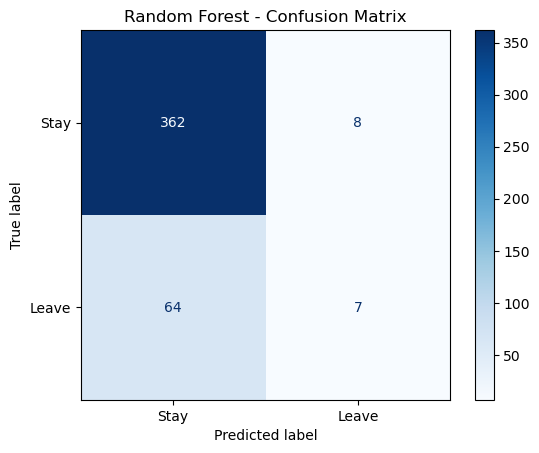

In [48]:
# 8. EVALUATION FUNCTION
# ----------------------------------
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['Stay','Leave'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_lr_prob)
evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_rf_prob)

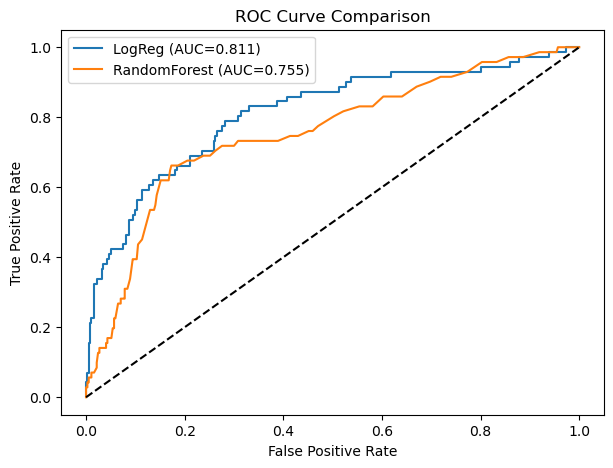

In [49]:
# 9. ROC CURVE COMPARISON
# ----------------------------------
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={roc_auc_score(y_test, y_pred_lr_prob):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC={roc_auc_score(y_test, y_pred_rf_prob):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

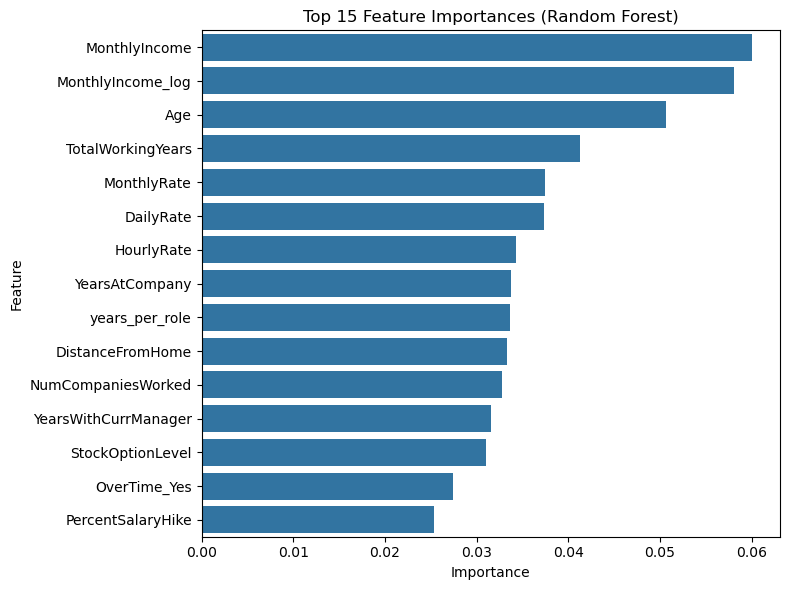

                 Feature  Importance
9          MonthlyIncome    0.060083
24     MonthlyIncome_log    0.058119
0                    Age    0.050639
16     TotalWorkingYears    0.041250
10           MonthlyRate    0.037420
1              DailyRate    0.037358
5             HourlyRate    0.034342
19        YearsAtCompany    0.033703
23        years_per_role    0.033684
2       DistanceFromHome    0.033279
11    NumCompaniesWorked    0.032799
22  YearsWithCurrManager    0.031527
15      StockOptionLevel    0.031047
52          OverTime_Yes    0.027445
12     PercentSalaryHike    0.025339


In [50]:
# 10. FEATURE IMPORTANCE (Random Forest)
# ----------------------------------
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, ohe_features])

rf_model = rf_pipeline.named_steps['classifier']
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

print(feat_imp)

In [51]:
# 11. SAVE MODELS
# ----------------------------------
os.makedirs("models", exist_ok=True)
pickle.dump(log_reg_pipeline, open("models/log_reg_pipeline.pkl", "wb"))
pickle.dump(rf_pipeline, open("models/rf_pipeline.pkl", "wb"))
print("✅ Models saved in 'models/' folder")

✅ Models saved in 'models/' folder


In [52]:
# 12. PROJECT SUMMARY
# ----------------------------------
print("""
PROJECT SUMMARY
---------------
Best Model: Random Forest (higher ROC-AUC, better recall on 'Leave' class)

Top Attrition Drivers:
1. Overtime
2. Job Role (Sales Representative, Laboratory Technician)
3. YearsAtCompany / Tenure
4. Monthly Income
5. Total Working Years

Recommendations:
- Address overtime workload for high-risk roles
- Improve retention for high-turnover job titles
- Review salary policies for underpaid, high-performing staff

Business Impact:
Reducing attrition by even 5% could save significant recruitment and training costs annually.
""")


PROJECT SUMMARY
---------------
Best Model: Random Forest (higher ROC-AUC, better recall on 'Leave' class)

Top Attrition Drivers:
1. Overtime
2. Job Role (Sales Representative, Laboratory Technician)
3. YearsAtCompany / Tenure
4. Monthly Income
5. Total Working Years

Recommendations:
- Address overtime workload for high-risk roles
- Improve retention for high-turnover job titles
- Review salary policies for underpaid, high-performing staff

Business Impact:
Reducing attrition by even 5% could save significant recruitment and training costs annually.



In [53]:
# Additional analyses that could be added:

# 1. Advanced cross-tabulations
def advanced_attrition_analysis(df):
    # Distance from home by job role and attrition
    pivot_table = df.pivot_table(
        values='Attrition_flag', 
        index='JobRole', 
        columns='DistanceFromHome', 
        aggfunc='mean'
    )
    
    # Income by education and attrition
    education_income = df.groupby(['Education', 'Attrition']).agg({
        'MonthlyIncome': 'mean'
    }).round(2)
    
    return pivot_table, education_income

# 2. Statistical testing
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(
    pd.crosstab(df['OverTime'], df['Attrition'])
)

# 3. Cost-benefit analysis
def calculate_attrition_cost(num_employees_leaving, avg_replacement_cost=15000):
    return num_employees_leaving * avg_replacement_cost
